<a href="https://colab.research.google.com/github/nstsj/python_for_CL/blob/master/syntax_parsing/syntactic_parsers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

сегодня мы поговорим о синтаксических анализаторах: два главных - это парсеры от UDPipe и DeepPavlov, но в конце тетрадки вспомним про другие(обзорно) и попробуем основные два на парктике

## UDPipe 2.0

UDPipe - это готовый пайплайн* для токенизации, частеречной разметки, лемматизации и синтаксической разметки. Работает с файлами в формате [CoNLL-U](http://universaldependencies.org/format.html)
<br>
Есть как готовые [предобученные модели](https://github.com/jwijffels/udpipe.models.ud.2.0/tree/master/inst/udpipe-ud-2.0-170801), так и возможность обучить модель на своих данных (но это небыстро). 

Использует теги [UD-формата](https://universaldependencies.org/)
______
*пайплайном называют цепочку из нескольких инструментов, используемых один за другим (pipeline, от англ. pipe- труба)*

* [общая информация](http://ufal.mff.cuni.cz/udpipe#language_models)
* [мануал](http://ufal.mff.cuni.cz/udpipe/users-manual)
* [репозиторий](https://github.com/ufal/udpipe)
* [статья с описанием архитектуры](http://ufal.mff.cuni.cz/~straka/papers/2017-conll_udpipe.pdf)
* [онлайн-версия](http://lindat.mff.cuni.cz/services/udpipe/)



### шаг1: установка библиотеки
полная информация о разных способах установки UDPipe [здесь](http://ufal.mff.cuni.cz/udpipe/install)
<br>
Мы попробуем простую, установив UPpipe как специальную библиотеку для питона, через ```pip3```

[документация для питонской библиотеки](https://pypi.org/project/ufal.udpipe/)

In [30]:
# ячейка может выполняться долго, это нормально
! pip3 install ufal.udpipe
from ufal.udpipe import Model, Pipeline #импортируем нужные части из модуля

     |████████████████████████████████| 307kB 2.8MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp36-cp36m-linux_x86_64.whl size=5625845 sha256=52ab8cb235e431db2b8b0827ce22c69ef85b0837a13d468a5ba010e5bdce45e7
  Stored in directory: /root/.cache/pip/wheels/0c/9d/db/6d3404c33da5b7adb6c6972853efb6a27649d3ba15f7e9bebb
Successfully built ufal.udpipe


### шаг2: выбор модели

Чтобы работать с UDPipe, нужно выбрать модель: уже готовую, или обучить на своих данных.
<br>
Мы сегодня не будем обучать новые модели (это слишком долго), а используем [готовую модель для русского](https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe)

In [28]:
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true

--2019-12-07 01:56:50--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2019-12-07 01:56:50--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2019-12-07 01:56:51--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpip

In [0]:
model = Model.load(UDPIPE_MODEL_FN) # загружаем модель, сохраняем в переменную model

### шаг3 текст

создадим какой-нибудь небольшой текст, на котором будем тестить модель:

    1	Собянин	_	NOUN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing|fPOS=NOUN++	2	nsubj	_	_
    2	открыл	_	VERB	_	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act|fPOS=VERB++	0	ROOT	_	_
    3	новый	_	ADJ	_	Animacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing|fPOS=ADJ++	4	amod	_	_
    4	парк	_	NOUN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing|fPOS=NOUN++	2	dobj	_	_
    5	и	_	CONJ	_	fPOS=CONJ++	4	cc	_	_
    6	детскую	_	ADJ	_	Case=Acc|Degree=Pos|Gender=Fem|Number=Sing|fPOS=ADJ++	7	amod	_	_
    7	площадку	_	NOUN	_	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing|fPOS=NOUN++	4	conj	_	_
    8	.	_	PUNCT	.	fPOS=PUNCT++.	2	punct	_	_

In [37]:
sent = "Собянин открыл новый парк и детскую площадку."
print(sent)

Собянин открыл новый парк и детскую площадку.


### шаг4: анализируем

In [55]:
pipeline = Pipeline(model, 'generic_tokenizer', '','','') #функции нужно 5 аргументов,но нам важны только 2
#сохраняем в переменную результат токенизации
ud_res = []
parsed = pipeline.process(sent) # функция process сделает синтаксический анализ, сохраняем еще раз

print(parsed) # печатаем результат
#type(parsed)

# newdoc
# newpar
# sent_id = 1
# text = Собянин открыл новый парк и детскую площадку.
1	Собянин	Собянин	PROPN	NNP	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	2	nsubj	_	_
2	открыл	ОТКРЫТЬ	VERB	VBC	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin	0	root	_	_
3	новый	НОВЫЙ	ADJ	JJL	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	4	amod	_	_
4	парк	ПАРК	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	2	obj	_	_
5	и	И	CCONJ	CC	_	7	cc	_	_
6	детскую	детскую	ADJ	JJL	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	7	amod	_	_
7	площадку	ПЛОЩАДКА	NOUN	NN	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	4	conj	_	SpaceAfter=No
8	.	.	PUNCT	.	_	2	punct	_	SpacesAfter=\n




дефолтный теггинг иногда может быть ошибочным: теггер предсказывает морфологические свойства токена по последним четырем символам каждого слова. Он генерирует гипотезы относительно части речи и морфологических тегов этого слова, а затем отбирает лучший вариант. 
<br>
*(можно улучшать качество, например, используя сторонний морфоанализатор и токенизатор, но это тема для отдельной пары, сегодня мы попробуем "ванильный" UDPipe)*

## DeepPavlov

[DeepPavlov](http://docs.deeppavlov.ai/en/0.7.0/index.html) - это библиотека для решения различных NLP-задач от МФТИ, недавно они выкатили синтаксический анализатор

[документация](http://docs.deeppavlov.ai/en/0.7.0/features/models/syntaxparser.html)

модель выдает результат в CONLL-U формате и обучена на   [UD-трибанках](http://universaldependencies.org/format.html)

In [41]:
# установка (может быть долго)
!pip3 install deeppavlov
!pip3 install russian-tagsets
!python -m deeppavlov install syntax_ru_syntagrus_bert

email-validator not installed, email fields will be treated as str.
To install, run: pip install email-validator
2019-12-07 02:05:26.598 INFO in 'deeppavlov.core.common.file'['file'] at line 30: Interpreting 'syntax_ru_syntagrus_bert' as '/usr/local/lib/python3.6/dist-packages/deeppavlov/configs/syntax/syntax_ru_syntagrus_bert.json'
  Cloning https://github.com/deepmipt/bert.git (to revision feat/multi_gpu) to /tmp/pip-req-build-y_kqpusg
  Running command git clone -q https://github.com/deepmipt/bert.git /tmp/pip-req-build-y_kqpusg
  Running command git checkout -b feat/multi_gpu --track origin/feat/multi_gpu
  Switched to a new branch 'feat/multi_gpu'
  Branch 'feat/multi_gpu' set up to track remote branch 'feat/multi_gpu' from 'origin'.
  Created wheel for bert-dp: filename=bert_dp-1.0-cp36-none-any.whl size=23580 sha256=15f5db584e456ceaf9e497a91c572a59034b6ce05b0b6b255dfb38b3d957cae6
  Stored in directory: /tmp/pip-ephem-wheel-cache-e0mqp5x0/wheels/1e/41/94/886107eaf932532594886fd8b

In [42]:
# импортим модель (здесь тоже долго..)
from deeppavlov import build_model, configs 
dpavlov_model = build_model("ru_syntagrus_joint_parsing", download=True)

2019-12-07 02:06:02.563 INFO in 'deeppavlov.core.common.file'['file'] at line 30: Interpreting 'ru_syntagrus_joint_parsing' as '/usr/local/lib/python3.6/dist-packages/deeppavlov/configs/syntax/ru_syntagrus_joint_parsing.json'
2019-12-07 02:06:04.627 INFO in 'deeppavlov.download'['download'] at line 117: Skipped http://files.deeppavlov.ai/deeppavlov_data/syntax_parser/syntax_ru_syntagrus_bert.tar.gz download because of matching hashes
2019-12-07 02:06:06.494 INFO in 'deeppavlov.download'['download'] at line 117: Skipped http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_v1.tar.gz download because of matching hashes
2019-12-07 02:06:07.79 INFO in 'deeppavlov.download'['download'] at line 117: Skipped http://files.deeppavlov.ai/deeppavlov_data/morpho_tagger/UD2.3/ru_syntagrus.tar.gz download because of matching hashes
2019-12-07 02:06:08.863 INFO in 'deeppavlov.download'['download'] at line 117: Skipped http://files.deeppavlov.ai/deeppavlov_data/morpho_tagger/BER

INFO:tensorflow:Restoring parameters from /root/.deeppavlov/models/morpho_ru_syntagrus/model


2019-12-07 02:06:30.166 WARNING in 'deeppavlov.core.models.serializable'['serializable'] at line 52: No load path is set for UDPymorphyLemmatizer!
2019-12-07 02:06:30.589 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /root/.deeppavlov/models/syntax_ru_syntagrus/deps.dict]
2019-12-07 02:06:57.868 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /root/.deeppavlov/models/syntax_ru_syntagrus/model_joint]


INFO:tensorflow:Restoring parameters from /root/.deeppavlov/models/syntax_ru_syntagrus/model_joint


In [130]:
sentences = ["Собянин открыл новый парк и детскую площадку."]
#model['main'].to_output_string = False
#model['main'].output_format = 'dict'

for parse in dpavlov_model(sentences): # аргумент должен быть списком
    print(parse)

1	Собянин	собянин	PROPN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	2	nsubj	_	_
2	открыл	открыть	VERB	_	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	0	root	_	_
3	новый	новый	ADJ	_	Animacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing	4	amod	_	_
4	парк	парк	NOUN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	2	obj	_	_
5	и	и	CCONJ	_	_	7	cc	_	_
6	детскую	детский	ADJ	_	Case=Acc|Degree=Pos|Gender=Fem|Number=Sing	7	amod	_	_
7	площадку	площадка	NOUN	_	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	4	conj	_	_
8	.	.	PUNCT	_	_	2	punct	_	_


# способы применения
Зачем нужен синтаксический парсинг? 

Например, с помощью него можно находить в предложениях тройки субъект-глагол-объект, которые можно использовать для извлечения информации из текста.

**визуализация**

В nltk есть DependencyGraph, который умеет рисовать деревья (и ещё многое другое). Для того, чтобы визуализация работала корректно, ему нужна зависимость: graphviz.

In [0]:
! pip3 install graphviz

In [0]:
from nltk import DependencyGraph

Для построения дерева нам нужно преврать файл в conllu-формате в список
<br> 
Еще нужно сделать тег ROOT в верхнем регистре, иначе он не находится

Создадим функцию, которую попробуем на результате UDPipe и на результате DeepPavlov

In [0]:
def conllu_to_list(parser_result): # аргумент - это conllu-файл, который получили в результате синтаксического анализа 
    sents = []
    for sent in parser_result.split('\n\n'):
        # убираем коменты
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        # заменяем регистр для root
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents.append(sent)
        return sents

## для UDPipe

In [0]:
# вызовем для результата UDPipe:

ud = conllu_to_list(parsed)

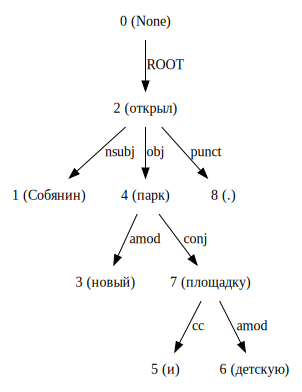

In [0]:
# нарисуем граф для UDPipe
ud_graph = DependencyGraph(tree_str=ud[0])
ud_graph

In [0]:
# посмотрим, на что вообще можно разбить предложение
list(ud_graph.triples())

[(('открыл', 'VERB'), 'nsubj', ('Собянин', 'PROPN')),
 (('открыл', 'VERB'), 'obj', ('парк', 'NOUN')),
 (('парк', 'NOUN'), 'amod', ('новый', 'ADJ')),
 (('парк', 'NOUN'), 'conj', ('площадку', 'NOUN')),
 (('площадку', 'NOUN'), 'cc', ('и', 'CCONJ')),
 (('площадку', 'NOUN'), 'amod', ('детскую', 'ADJ')),
 (('открыл', 'VERB'), 'punct', ('.', 'PUNCT'))]

In [0]:
# еще один способ визуализации дерева
ud_tree = ud_graph.tree()
print(ud_tree.pretty_print())

            открыл                      
    __________|_____                     
   |     |         парк                 
   |     |     _____|______              
   |     |    |         площадку        
   |     |    |      ______|________     
Собянин  .  новый   и            детскую

None


**Тройки глагол-объект-субьект:**

Предположим, нам нужно вытащить только ту тройку, которая расскажет о предикате(сказуемом), субъекте(подлежащем) и объекте(дополнении)

In [118]:
def get_sov(sent): # зададим функцию, которая будет вытаскивать нужную тройку
    graph = DependencyGraph(tree_str=ud[0])
    #ud_graph = DependencyGraph(tree_str=ud[0]) 
    sov = {} # пустой словарь, будем в него складывать
    for triple in graph.triples(): # для каждого триплета из всех
        if triple:
            if triple[0][1] == 'VERB': # если тег первого элемента - VERB
                sov[triple[0][0]] = {'subj':'','obj':''}
    for triple in graph.triples():
        if triple:
            if triple[1] == 'nsubj':
                if triple[0][1] == 'VERB':
                    sov[triple[0][0]]['subj']  = triple[2][0]
            if triple[1] == 'obj':
                if triple[0][1] == 'VERB':
                    sov[triple[0][0]]['obj'] = triple[2][0]
    return sov

sov = get_sov(sent)
print(sov)

{'открыл': {'subj': 'Собянин', 'obj': 'парк'}}


улучшим функцию, теперь она находит однородные дополнения *(парк и площадку)*

In [129]:
from collections import defaultdict as dd


def get_sov(sent):
    graph = DependencyGraph(tree_str=ud[0])

    subjects = dd(lambda : {"subject": "", "verb": "", "objects": []})
    verbs = dd(lambda : {"subject": "", "verb": "", "objects": []})
    
    for triple in graph.triples():
        if triple:
            
            if triple[1] == 'conj':
                subjects[triple[0][0]]["objects"].append(triple[2][0])
                
            if triple[1] == 'nsubj':
                if triple[0][1] == 'VERB':
                    verbs[triple[0][0]]["subject"] = triple[2][0]
            if triple[1] == 'obj':
                if triple[0][1] == 'VERB':
                    subjects[triple[2][0]]["verb"] = triple[0][0]
                    subjects[triple[2][0]]["objects"].append(triple[2][0])

    
    sovs = []

    print(subjects, verbs)
    
    for v in subjects.values():
        for obj in v["objects"]:
            sovs.append((verbs[v["verb"]]["subject"], v["verb"], obj))
    return sovs

sov = get_sov(sent)
print("\n",sov[-2:])

defaultdict(<function get_sov.<locals>.<lambda> at 0x7f96b56b4840>, {'парк': {'subject': '', 'verb': 'открыл', 'objects': ['парк', 'площадку']}}) defaultdict(<function get_sov.<locals>.<lambda> at 0x7f96b56b41e0>, {'открыл': {'subject': 'Собянин', 'verb': '', 'objects': []}})

 [('Собянин', 'открыл', 'парк'), ('Собянин', 'открыл', 'площадку')]


## для DeepPavlov

In [0]:
#теперь - для deeppavlov
dp = conllu_to_list(dpavlov_model(sentences)[0])

In [91]:
dp[0]

'1\tСобянин\tсобянин\tPROPN\t_\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Sing\t2\tnsubj\t_\t_\n2\tоткрыл\tоткрыть\tVERB\t_\tAspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act\t0\tROOT\t_\t_\n3\tновый\tновый\tADJ\t_\tAnimacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing\t4\tamod\t_\t_\n4\tпарк\tпарк\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Masc|Number=Sing\t2\tobj\t_\t_\n5\tи\tи\tCCONJ\t_\t_\t7\tcc\t_\t_\n6\tдетскую\tдетский\tADJ\t_\tCase=Acc|Degree=Pos|Gender=Fem|Number=Sing\t7\tamod\t_\t_\n7\tплощадку\tплощадка\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Fem|Number=Sing\t4\tconj\t_\t_\n8\t.\t.\tPUNCT\t_\t_\t2\tpunct\t_\t_'

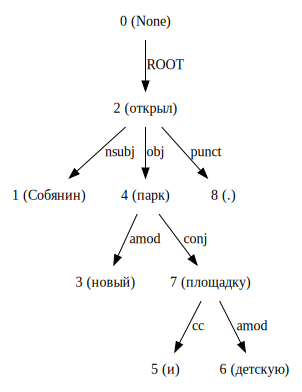

In [79]:
# нарисуем граф для DeepPavlov
dp_graph = DependencyGraph(tree_str=dp[0])
dp_graph

In [84]:
list(dp_graph.triples())

[(('открыл', 'VERB'), 'nsubj', ('Собянин', 'PROPN')),
 (('открыл', 'VERB'), 'obj', ('парк', 'NOUN')),
 (('парк', 'NOUN'), 'amod', ('новый', 'ADJ')),
 (('парк', 'NOUN'), 'conj', ('площадку', 'NOUN')),
 (('площадку', 'NOUN'), 'cc', ('и', 'CCONJ')),
 (('площадку', 'NOUN'), 'amod', ('детскую', 'ADJ')),
 (('открыл', 'VERB'), 'punct', ('.', 'PUNCT'))]

In [85]:
# дерево для DeepPavlov
dp_tree = dp_graph.tree()
print(dp_tree.pretty_print())

            открыл                      
    __________|_____                     
   |     |         парк                 
   |     |     _____|______              
   |     |    |         площадку        
   |     |    |      ______|________     
Собянин  .  новый   и            детскую

None


**Тройки глагол-объект-субьект:**

Предположим, нам нужно вытащить только ту тройку, которая расскажет о предикате(сказуемом), субъекте(подлежащем) и объекте(дополнении)

In [119]:
def get_sov(sent): # зададим функцию, которая будет вытаскивать нужную тройку
    dp_graph = DependencyGraph(tree_str=dp[0]) 
    sov = {} # пустой словарь, будем в него складывать
    for triple in graph.triples(): # для каждого триплета из всех
        if triple:
            if triple[0][1] == 'VERB': # если тег первого элемента - VERB
                sov[triple[0][0]] = {'subj':'','obj':''}
    for triple in graph.triples():
        if triple:
            if triple[1] == 'nsubj':
                if triple[0][1] == 'VERB':
                    sov[triple[0][0]]['subj']  = triple[2][0]
            if triple[1] == 'obj':
                if triple[0][1] == 'VERB':
                    sov[triple[0][0]]['obj'] = triple[2][0]
    return sov

sov = get_sov(sent)
print(sov)

{'открыл': {'subj': 'Собянин', 'obj': 'парк'}}


улучшим функцию, теперь она находит однородные дополнения *(парк и площадку)*

In [128]:
from collections import defaultdict as dd


def get_sov(sent):
    graph = DependencyGraph(tree_str=dp[0])

    subjects = dd(lambda : {"subject": "", "verb": "", "objects": []})
    verbs = dd(lambda : {"subject": "", "verb": "", "objects": []})
    
    for triple in graph.triples():
        if triple:
            
            if triple[1] == 'conj':
                subjects[triple[0][0]]["objects"].append(triple[2][0])
                
            if triple[1] == 'nsubj':
                if triple[0][1] == 'VERB':
                    verbs[triple[0][0]]["subject"] = triple[2][0]
            if triple[1] == 'obj':
                if triple[0][1] == 'VERB':
                    subjects[triple[2][0]]["verb"] = triple[0][0]
                    subjects[triple[2][0]]["objects"].append(triple[2][0])

    
    sovs = []

    print(subjects, verbs)
    
    for v in subjects.values():
        for obj in v["objects"]:
            sovs.append((verbs[v["verb"]]["subject"], v["verb"], obj))
    return sovs

sov = get_sov(sent)
print("\n",sov[-2:])

defaultdict(<function get_sov.<locals>.<lambda> at 0x7f96b56b2268>, {'парк': {'subject': '', 'verb': 'открыл', 'objects': ['парк', 'площадку']}}) defaultdict(<function get_sov.<locals>.<lambda> at 0x7f96b56b2510>, {'открыл': {'subject': 'Собянин', 'verb': '', 'objects': []}})

 [('Собянин', 'открыл', 'парк'), ('Собянин', 'открыл', 'площадку')]


## идеи дальше:
(на выбор)
1. Выбрать текст (на русском), с которым было бы интересно поработать. Попробовать вытащить все тройки предикат-субъект-объект из выбранного текста, посмотреть на результат, проинтерпретировать
2. Написать функцию,которая бы учитывала сложные сказуемые*(начинает уходить, устал думать)* как единый элемент (она похожа на функцию, которая собирает однородные дополнения, нам также нужно что-то сделать с тегами)
3. попробовать предобученные модели для других языков
4. Попробовать парсеры на предложениях с синтаксической омонимией, проинтерпретировать результаты 

# что есть еще? 

более немейнстримные парсеры

## SyntaxNet

SyntaxNet — это гугловская библиотека для определения синтаксических связей (использует нейронную сеть на TensorFlow). Поддерживает 40 языков, в том числе  русский.

* [документация](https://github.com/tensorflow/models/blob/master/research/syntaxnet/README.md)
* [репозиторий на гитхабе](https://github.com/tensorflow/models/tree/master/research/syntaxnet)
* [тьюториал](https://github.com/tensorflow/models/blob/master/research/syntaxnet/g3doc/syntaxnet-tutorial.md)
* [ссылка на обученные модели](https://github.com/tensorflow/models/blob/master/research/syntaxnet/g3doc/universal.md)

## Stanford Parser

* [о проекте](https://nlp.stanford.edu/software/stanford-dependencies.shtml#Languages)
* [о парсере](https://nlp.stanford.edu/software/lex-parser.html)
* [питонская обертка](http://projects.csail.mit.edu/spatial/Stanford_Parser)